What is Dropout?


Dropout is a regularization technique that randomly "drops out" (sets to zero) a proportion of neurons during training to prevent overfitting. During inference, all neurons are used but their outputs are scaled appropriately.

In [ ]:
# PyTorch
import torch
import torch.nn as nn

class SimpleNetWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(p=0.5)  # 50% dropout rate
        self.layer2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)  # Apply dropout
        return self.layer2(x)

In [ ]:
# TensorFlow
import tensorflow as tf

class SimpleNetWithDropout(tf.keras.Model):
    def __init__(self, hidden_size, num_classes):
        super().__init__()
        self.layer1 = tf.keras.layers.Dense(hidden_size, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)  # 50% dropout rate
        self.layer2 = tf.keras.layers.Dense(num_classes)
    
    def call(self, inputs, training=False):
        x = self.layer1(inputs)
        x = self.dropout(x, training=training)  # Dropout only active during training
        return self.layer2(x)

What is BatchNorm?

BatchNorm normalizes the output of a layer by subtracting the batch mean and dividing by the batch standard deviation. It then scales and shifts the result using learned parameters.

Why use BatchNorm?

Reduces internal covariate shift
Allows higher learning rates
Reduces dependency on initialization
Acts as regularization
Smooths the optimization landscape

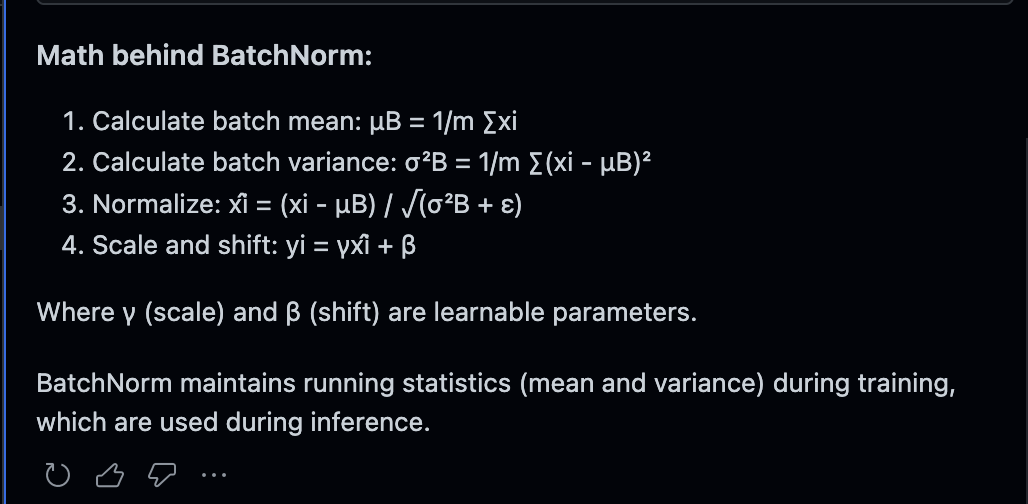

In [ ]:
import torch
import torch.nn as nn

class NetworkWithBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3, 64, 3)
        # BatchNorm after convolution
        self.bn = nn.BatchNorm2d(64)
        # Parameters:
        # - num_features: size of input channel (64)
        # - eps: small constant for numerical stability (default: 1e-5)
        # - momentum: for running stats (default: 0.1)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return torch.relu(x)

# During training:
model.train()  # BatchNorm uses batch statistics
# During inference:
model.eval()   # BatchNorm uses running statistics

In [1]:
import torch
import torch.nn as nn

class NeuralNetWithRegularization(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.5):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.layer2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Layer 1 with BatchNorm and Dropout
        x = self.layer1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        
        # Output layer
        x = self.layer2(x)
        return x

# Usage example
model = NeuralNetWithRegularization(input_size=784, hidden_size=256, num_classes=10)
# Training mode (dropout and batch norm active)
model.train()
# Evaluation mode (dropout and batch norm in inference mode)
model.eval()

NeuralNetWithRegularization(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (layer2): Linear(in_features=256, out_features=10, bias=True)
)

# ML regulization - RandomForestClassifier


Key Regularization Techniques in Random Forests:

（1）Bagging (Bootstrap Aggregating)

Each tree uses random subset of training data
Reduces variance without increasing bias

（2）Random Feature Selection

Each split uses random subset of features
Controls by max_features parameter
Common values: 'sqrt', 'log2'


（3）Tree Constraints
max_depth: Limits tree depth
min_samples_split: Minimum samples for splitting
min_samples_leaf: Minimum samples in leaf nodes


（4）Ensemble Size
n_estimators: Number of trees
More trees reduce variance but increase computation

In [ ]:
# Internally, each tree gets different training data
X_tree = resample(X, n_samples=len(X))  # Random sampling with replacement

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt'  # Only sqrt(n_features) considered at each split
)

In [ ]:
rf = RandomForestClassifier(
    max_depth=10,        # Limit tree depth
    min_samples_split=5, # Need at least 5 samples to split further
    min_samples_leaf=2   # Each leaf must have at least 2 samples
)

In [ ]:
# Pseudocode for majority voting
def predict(self, X):
    predictions = [tree.predict(X) for tree in self.trees]
    return mode(predictions)  # Most common prediction wins

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example implementation showing Random Forest regularization parameters
class RegularizedRandomForest:
    def __init__(self, 
                 n_estimators=100,
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 max_features='sqrt'):
        
        self.model = RandomForestClassifier(
            n_estimators=n_estimators,          # Number of trees
            max_depth=max_depth,                # Depth limit
            min_samples_split=min_samples_split, # Min samples to split node
            min_samples_leaf=min_samples_leaf,   # Min samples in leaf
            max_features=max_features,           # Features per split
            bootstrap=True                       # Use bootstrapping
        )
    
    def fit(self, X, y):
        self.model.fit(X, y)
        
# Usage example
rf = RegularizedRandomForest(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt'
)

# XGboost


https://blog.csdn.net/weixin_46838716/article/details/124537320

![CleanShot 2025-02-15 at 21.11.19@2x.png](<attachment:CleanShot 2025-02-15 at 21.11.19@2x.png>)
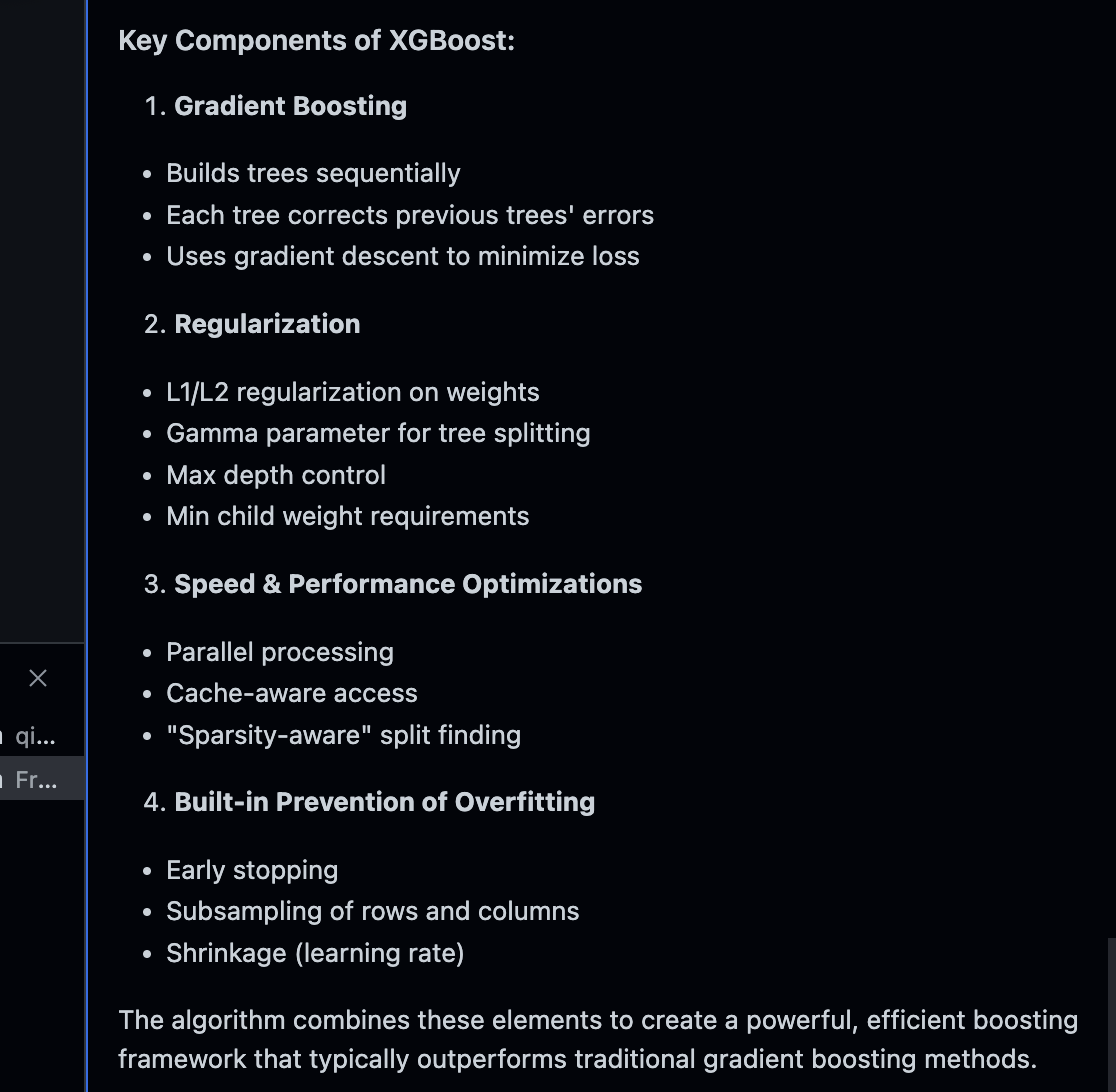

In [ ]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Example implementation showing XGBoost's key components
class XGBoostExample:
    def __init__(self,
                 learning_rate=0.1,
                 max_depth=3,
                 n_estimators=100,
                 min_child_weight=1,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8):
        
        self.model = xgb.XGBClassifier(
            learning_rate=learning_rate,     # Step size shrinkage
            max_depth=max_depth,             # Maximum tree depth
            n_estimators=n_estimators,       # Number of trees
            min_child_weight=min_child_weight, # Minimum sum of weights
            gamma=gamma,                     # Minimum loss reduction
            subsample=subsample,             # Fraction of samples per tree
            colsample_bytree=colsample_bytree, # Fraction of features per tree
            objective='binary:logistic'      # Loss function
        )
        
    def train(self, X, y):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
        
        # Early stopping to prevent overfitting
        self.model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            early_stopping_rounds=10,
            verbose=False
        )